<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/Supervised_learning_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
!pip install mglearn
import mglearn

In [25]:
dataset = pd.read_csv("https://raw.githubusercontent.com/550tealeaves/DATA71200_sum2024_550/main/project%201/pizza_edited.csv")
print(dataset.head())

  company  price_cad  diameter_in      topping           variant     size  \
0       A         29         22.0      chicken  double_signature    jumbo   
1       A         25         20.0    pepperoni  double_signature    jumbo   
2       A         19         16.0    mushrooms  double_signature  regular   
3       A         22         14.0  smoked_beef  double_signature  regular   
4       A         30         18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0      yes_es       yes_ec           no_em  
1      yes_es       yes_ec           no_em  
2      yes_es       yes_ec          yes_em  
3      yes_es        no_ec          yes_em  
4      yes_es        no_ec          yes_em  


In [26]:
columns = ['topping', 'variant', 'size', 'extra_sauce', 'extra_cheese','extra_mushrooms']
dataset = pd.concat([dataset]+[pd.get_dummies(dataset[i],drop_first=True) for i in columns],axis=1)
dataset.drop(columns,axis=1,inplace=True)
dataset.head(3)

,company,price_cad,diameter_in,black_pepper,chicken,meat,mozzarella,mushrooms,onion,pepperoni,...,super_supreme,thai_veggie,jumbo,large,medium,regular,small,yes_es,yes_ec,yes_em
0,A,29,22.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
1,A,25,20.0,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,True,False
2,A,19,16.0,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,True


In [27]:
#predicting the company name based on certain features
y = dataset['company']
print(y)

0      A
1      A
2      A
3      A
4      A
      ..
124    E
125    E
126    E
127    E
128    E
Name: company, Length: 129, dtype: object


In [28]:
#dropped the features that are probably not relevant to the model
X = dataset.drop(['company'], axis=1)
print(X)

     price_cad  diameter_in  black_pepper  chicken   meat  mozzarella  \
0           29         22.0         False     True  False       False   
1           25         20.0         False    False  False       False   
2           19         16.0         False    False  False       False   
3           22         14.0         False    False  False       False   
4           30         18.0         False    False  False        True   
..         ...          ...           ...      ...    ...         ...   
124         11          8.5         False    False  False       False   
125         14         12.0         False    False  False       False   
126         17         14.0         False    False  False       False   
127         12          8.5         False    False   True       False   
128         15         12.0         False    False   True       False   

     mushrooms  onion  pepperoni  sausage  ...  super_supreme  thai_veggie  \
0        False  False      False    False  ..

In [29]:
#do testing/training split - need different code for own data b/c no .data or .target
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [30]:
X_train.shape

(96, 40)

In [31]:
X_test.shape

(33, 40)

In [32]:
y_train.shape

(96,)

In [33]:
y_test.shape

(33,)

# k-Nearest Neighbors

### Import and instantiate the class - set paraneter of # neighbors

In [34]:
#import and instantiate the class - set paraneter of # neighbors
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)

### Fit classifier using training set

In [35]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Call the predict() method to make predictions on test data - will compute closest neighboro in training set

In [36]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: ['C' 'C' 'A' 'C' 'B' 'A' 'B' 'C' 'E' 'A' 'A' 'C' 'C' 'B' 'B' 'B' 'C' 'B'
 'A' 'A' 'C' 'A' 'B' 'E' 'C' 'E' 'B' 'C' 'B' 'A' 'B' 'B' 'A']


Use score() method to evaluate how well model generalizes

In [37]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.45


**Model is 45% accurate = correctly predicdted the class for 45% of the samples in test dataset**

> Add blockquote



In [38]:
print("Training set accuracy: {:.2f}".format(clf.score(X_train, y_train)))

Training set accuracy: 0.60


**Model is 60% accurate = correctly predicted the class for 60% of the samples in the training dataset**

## Analyzing kNeighbors Classifier

InvalidIndexError: (slice(None, None, None), 0)

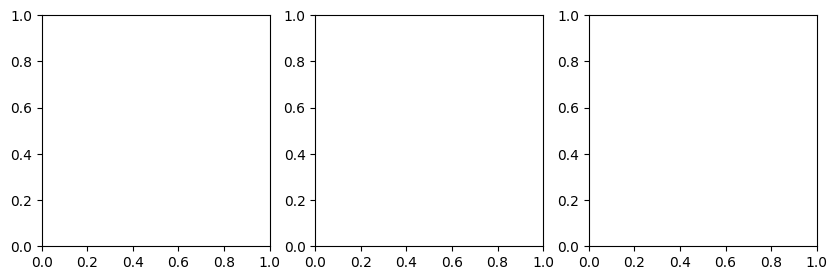

In [19]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#     # fit the model
#     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
#     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
#     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
#     ax.set_title("{} neighbor(s)".format(n_neighbors))
#     ax.set_xlabel("feature 0")
#     ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

# Breast cancer dataset

In [54]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys()) # Print the keys available in the cancer dictionary
print(cancer['DESCR']) # Access and print the description of the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

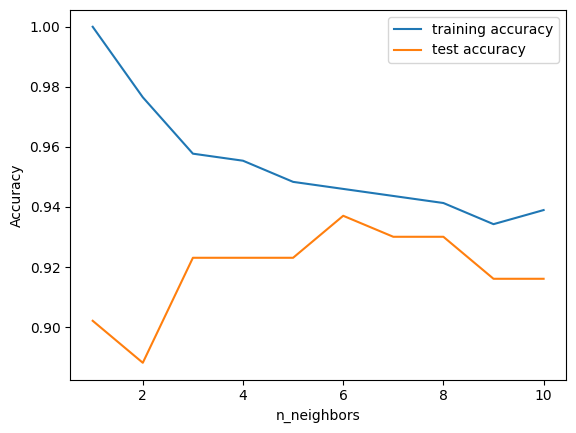

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
  # build model
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # record training set accuracy
  training_accuracy.append(clf.score(X_train, y_train))
  # record generalization
  test_accuracy.append(clf.score(X_test, y_test))


plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

ValueError: X has 2 features, but KNeighborsClassifier is expecting 30 features as input.

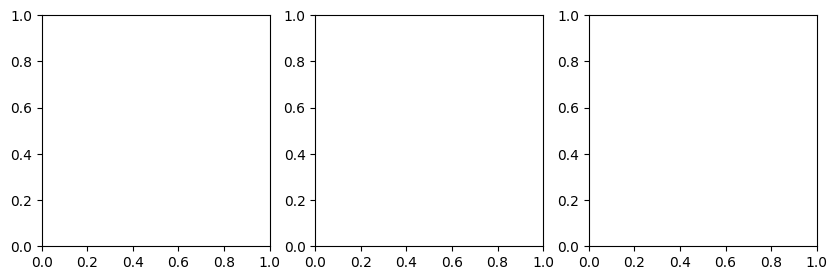

In [61]:
# fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# for n_neighbors, ax in zip([1, 3, 9], axes):
#   # the fit method returns object self, so we can instantiate
#   # and fit in one line
#   clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
#   mglearn.plots.plot_2d_separator(clf, X_train, fill=True, eps=0.5, ax=ax, alpha=.4)
#   mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
#   ax.set_title("{} neighbor(s)".format(n_neighbors))
#   ax.set_xlabel("feature 0")
#   ax.set_ylabel("feature 1")
# axes[0].legend(loc=3)

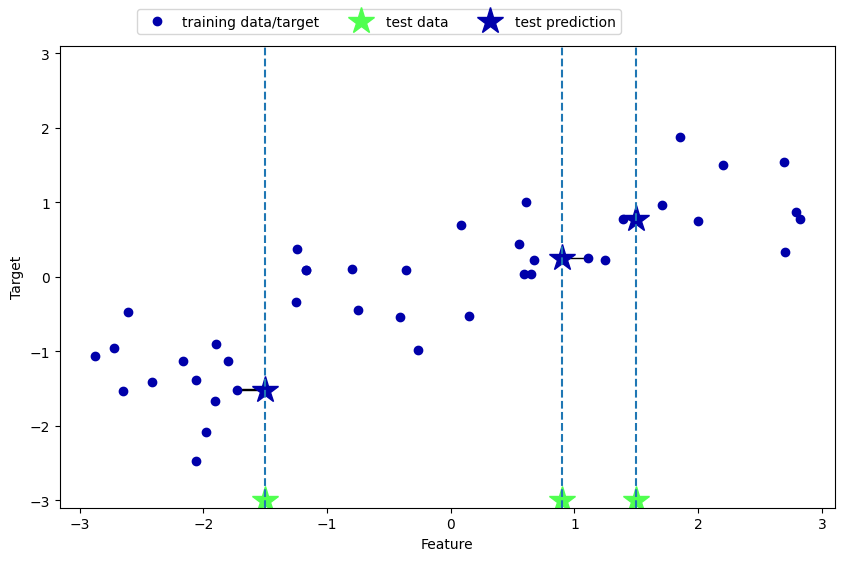

In [62]:
#k-neighbors regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

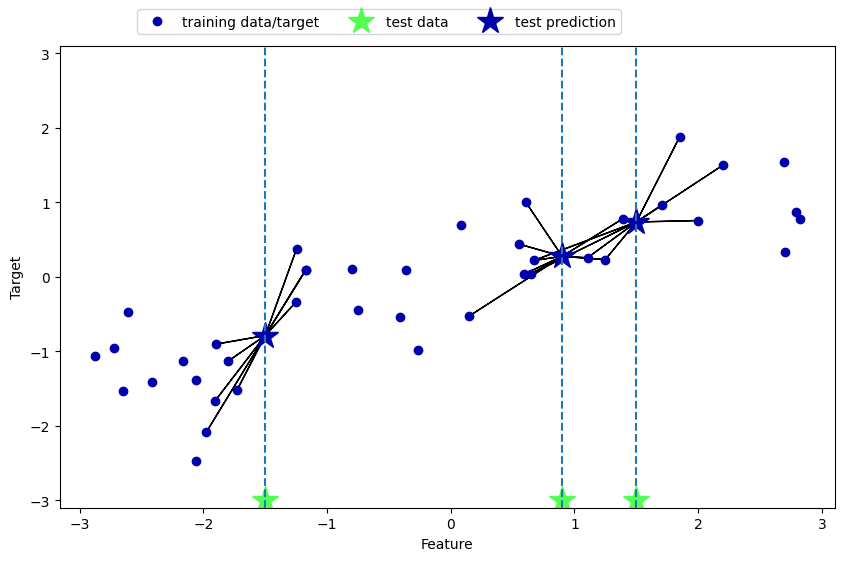

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors=9)

In [64]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [65]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

Test set predictions:
[ 0.42999717 -0.05396539 -0.12350225  0.16941863 -0.08973653 -0.8301424
 -1.62784743 -0.09712694  0.16941863 -1.62784743]


In [66]:

print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.74


Socre of 0.74 is a decent model fit

## Analyze kNeighbors Regressor

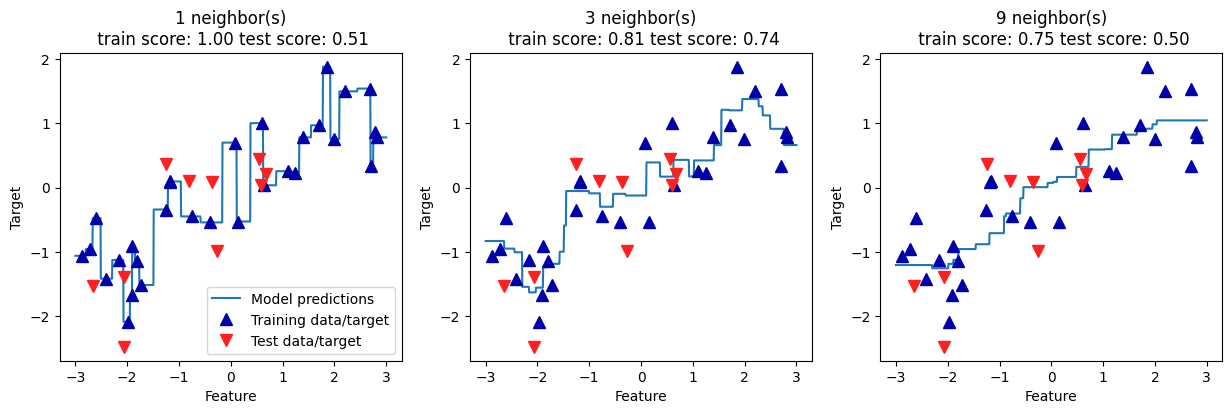

In [72]:
from os import linesep
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1000 data points, evenly spaced b/w -3 & 3
line= np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes): #1,3,9 = diff neighbor parameters
  #make predictions using 1, 3, or 9 neighbors
  reg = KNeighborsRegressor(n_neighbors=n_neighbors)
  reg.fit(X_train, y_train)
  ax.plot(line, reg.predict(line))
  ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
  ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
  ax.set_title(
    "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
      n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
  ax.set_xlabel("Feature")
  ax.set_ylabel("Target")
  axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")

# Linear models


w[0]: 0.393906  b: -0.031804


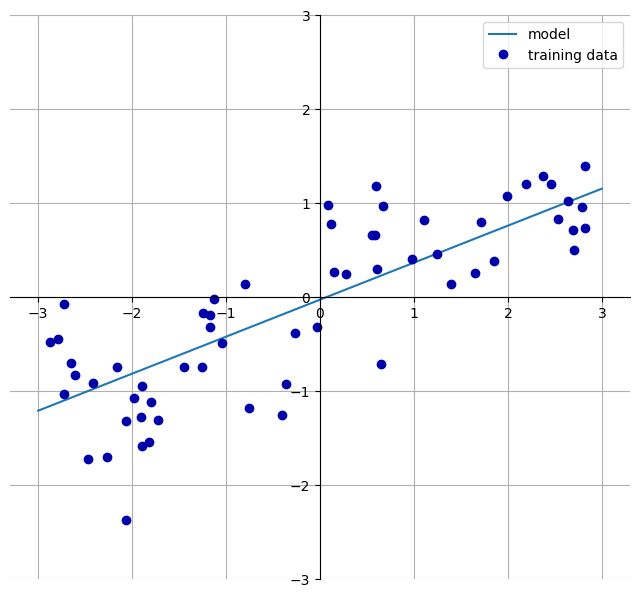

In [73]:
mglearn.plots.plot_linear_regression_wave()

Linear regression aka ordinary least squares

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [78]:
print("Training set score: {:2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:2f}".format(lr.score(X_test, y_test)))

Training set score: 0.670089
Test set score: 0.659337


## While R^2 of 0.66 is not good, the fact that the trainign and testing scores are close together means that we are more likely underfitting the data instead of overfitting it.